# 1. What is Machine Learning?
Machine learning is a scientific discipline that explores the construction and study of algorithms that can *learn* from data. Such algorithms operate by building a model from example inputs an using that to make *predictions* or *decisions*, rather than following strictly static instructions. 

We can take an example of predicting the type of flower based on sepal length and width of the flower. Let's say we have some data (discretized iris data set on sepal length and width). The data set looks like:

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")
%matplotlib inline

In [3]:
iris = load_iris()
mini_iris = np.round(iris.data[:, :2]).astype(int)
data = pd.DataFrame(mini_iris, columns=['length', 'width'])
data['type'] = iris.target

#Shuffle data
data = data.iloc[np.random.permutation(len(data))]

In [9]:
data.head()

,length,width,type
113,6,2,2
53,6,2,1
12,5,3,0
21,5,4,0
104,6,3,2


## 2. Different ways of learning from data
Now, let's say we want to predict the type of flower for a new given data point. There are multiple ways to solve this problem. We will consider these two ways in some detail:
1. We could find a **function** which can directly map an input value to its class label. 
2. We can find the probability distributions over the variables and then use this distribution to answer queries about the new data point. 

There are a lot of algorithms for finding a mapping function. For example, **linear regression** tries to find a linear equation which explains the data. **Support vector machines** try to find a plane which separates the data points. **Decision Trees** try to find a set of simple greater than and less than equations to classify the data. Let's try to apply a decision on this data set. 

We can plot the data and it looks something like this:

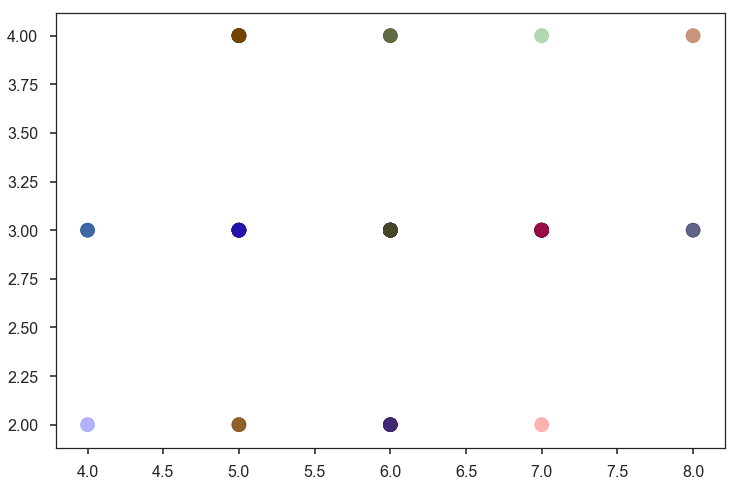

In [22]:
# Plot data without noise
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data.length, data.width, c=['b', 'g', 'r'], s=200, alpha=0.3)

We can see that many of our points directly overlap. We can add some noise to make it easier to visualize:

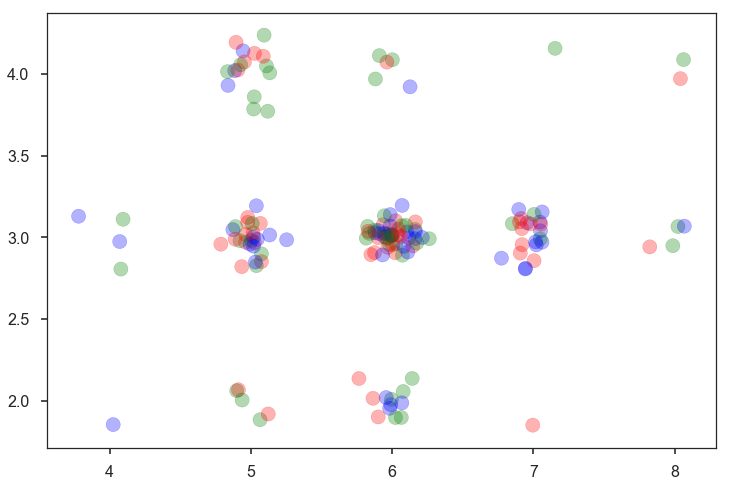

In [24]:
# Adding a little bit of noise so that it's easier to visualize
data_with_noise = data.iloc[:, :2] + np.random.normal(loc=0, scale=0.1, size=(150, 2))
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data_with_noise.length, data_with_noise.width, c=['b', 'g', 'r'], s=200, alpha=0.3)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.ix[:, ['length', 'width']]
                                                    .values, data.type.values, test_size=0.2)

In [58]:
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array([0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 1, 2, 1])

In [59]:
classifier.score(X_test, y_test)

0.7

So, in this case we got a classification accuracy of 70%. 

Now, let's move on to our second approach using a probabilistic model. The most obvious way to do this classification task would be to compute a Joint Probability Distribution over all these variables and then marginalize and reduce over these according to our new data point to get the probabilities of each class.

In [60]:
X_train, X_test = data[:120], data[120:]

In [61]:
X_train.head()

,length,width,type
113,6,2,2
53,6,2,1
12,5,3,0
21,5,4,0
104,6,3,2


In [62]:
X_train.shape

(120, 3)

In [87]:
# Computing the joint probability distribution over the training data
joint_prob = X_train.groupby(['length', 'width', 'type']).size() / 120
joint_prob 

length  width  type
4       2      0       0.008333
        3      0       0.033333
5       2      1       0.033333
               2       0.008333
        3      0       0.158333
               1       0.016667
        4      0       0.108333
6       2      1       0.066667
               2       0.016667
        3      1       0.191667
               2       0.150000
        4      0       0.041667
7       2      2       0.008333
        3      1       0.033333
               2       0.066667
        4      2       0.008333
8       3      2       0.033333
        4      2       0.016667
dtype: float64

In [93]:
joint_prob[5, 2]

type
1    0.033333
2    0.008333
dtype: float64

In [86]:
# Predicting values

# Selecting just the feature variables.
X_test_features = X_test.iloc[:, :2].values
X_test_actual_results = X_test.iloc[:, 2].values

predicted_values = []
for i in X_test_features:
    print(joint_prob[i[0], i[1]])
    predicted_values.append(np.argmax(joint_prob[i[0], i[1]]))
    
predicted_values = np.array(predicted_values)
predicted_values

type
1    0.033333
2    0.066667
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
1    0.033333
2    0.066667
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
0    0.158333
1    0.016667
dtype: float64
type
1    0.033333
2    0.066667
dtype: float64
type
1    0.033333
2    0.066667
dtype: float64
type
1    0.033333
2    0.066667
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
1    0.033333
2    0.066667
dtype: float64
type
1    0.033333
2    0.066667
dtype: float64
type
0    0.158333
1    0.016667
dtype: float64
type
0    0.158333
1    0.016667
dtype: float64
type
0    0.108333
dtype: float64
type
0    0.158333
1    0.016667
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
1    0.191667
2    0.150000
dtype: float64
type
0

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


array([2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0,
       1, 2, 1, 1, 0, 2, 0, 2])